<a href="https://colab.research.google.com/github/meriemdouider1/pfe/blob/main/gainxgbost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy 
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
Cl1 = '/content/Classeurcc.xlsx'
data1= pd.read_excel(Cl1,
sheet_name=0,
header=0,
index_col=False,
keep_default_na=True)

In [ ]:
del data1["Source"]
del data1["CodeSite"]
data1.head()

,X_long,Y_lat,Cs_longia,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.91142,23.79474,1,0.000000,0.0,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.18837,27.13295,1,0.000214,0.0,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.18837,27.13295,1,0.000214,0.0,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.18562,27.15794,0,0.000000,0.0,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.16718,27.15773,0,0.000000,0.0,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8


In [ ]:
X1 = data1.loc[:, data1.columns != 'Cs_longia']
y1 = data1.Cs_longia

In [ ]:
y1

0      1
1      1
2      1
3      0
4      0
      ..
255    1
256    1
257    1
258    1
259    1
Name: Cs_longia, Length: 260, dtype: int64

In [ ]:
# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot
import xgboost as xgb

XGBClassifier


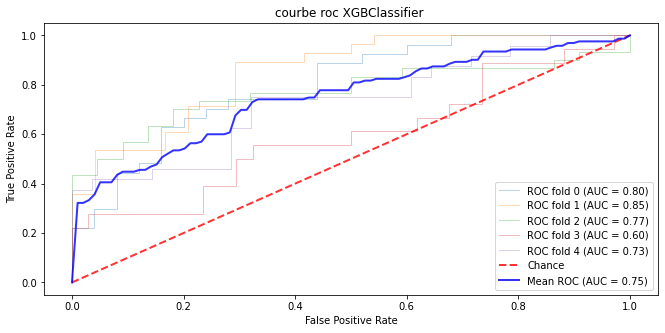

Accuracy: [0.73076923 0.73076923 0.73076923 0.55769231 0.69230769]
moy_accuracy: 0.69
precision: [0.7826087  0.75       0.80769231 0.4        0.65384615]
moy_precision: 0.68
sensibilité : [0.66666667 0.75       0.7        0.55555556 0.70833333]
moy_sensibilité: 0.68
spécificité : [0.8        0.70833333 0.77272727 0.55882353 0.67857143]
moy_spécificité: 0.70
MCC : [0.46945693 0.45833333 0.46709937 0.10891067 0.38575837]
MCC: 0.38


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import SVC

classifiers = {
    "XGBClassifier": XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=3,n_estimators=100)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC

my_scorer1 = make_scorer(tp1, greater_is_better=True)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split(X1, y1)):
         model=clf.fit(X1.loc[train,], y1.loc[train,])
         viz = plot_roc_curve(clf, X1.loc[test,], y1.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)
      

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf, X1, y1, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, X1, y1, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf, X1, y1, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, X1, y1, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, X1, y1, scoring=my_scorer1, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))

XGBClassifier


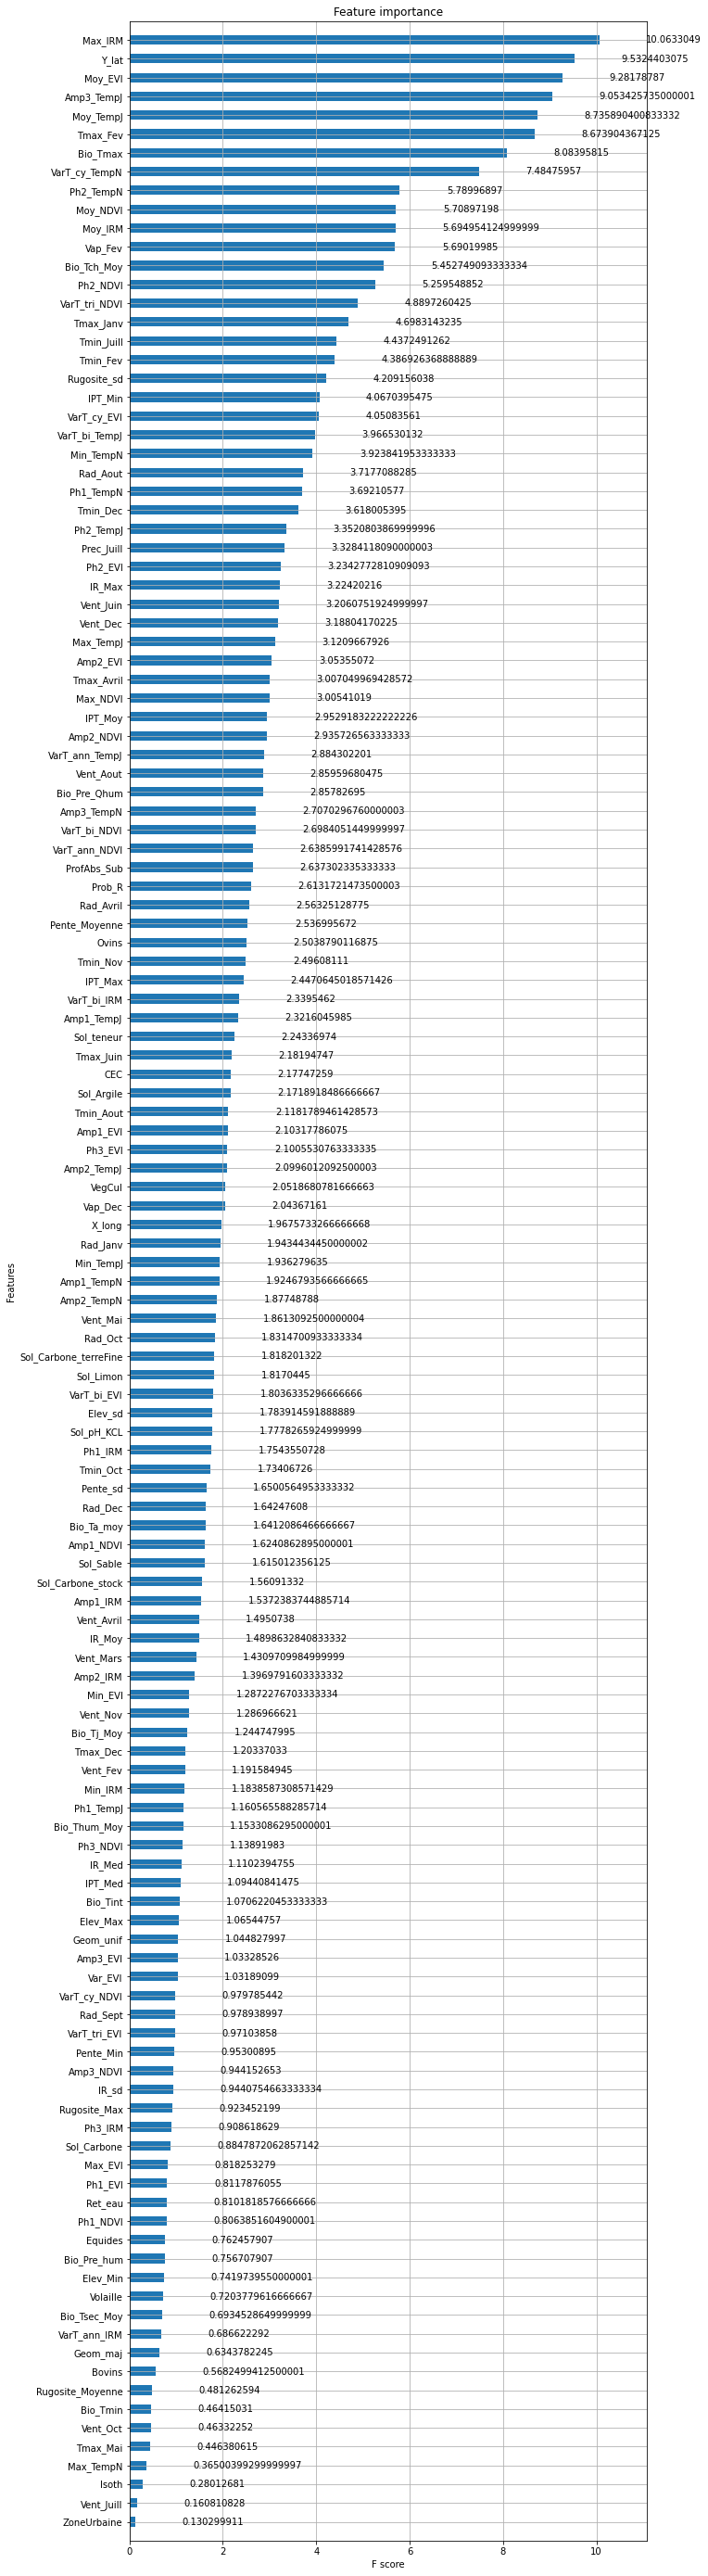

{'Amp3_TempJ': 9.053425735000001, 'Moy_TempJ': 8.735890400833332, 'Vent_Dec': 3.18804170225, 'Tmax_Fev': 8.673904367125, 'Ph2_NDVI': 5.259548852, 'Ovins': 2.5038790116875, 'Tmax_Janv': 4.6983143235, 'Moy_IRM': 5.694954124999999, 'VarT_bi_TempJ': 3.966530132, 'Ph1_IRM': 1.7543550728, 'Moy_EVI': 9.28178787, 'IPT_Moy': 2.9529183222222226, 'Y_lat': 9.5324403075, 'Max_TempJ': 3.1209667926, 'Min_EVI': 1.2872276703333334, 'Rad_Aout': 3.7177088285, 'Ph2_TempJ': 3.3520803869999996, 'Tmin_Fev': 4.386926368888889, 'Tmax_Avril': 3.007049969428572, 'IPT_Min': 4.0670395475, 'Prob_R': 2.6131721473500003, 'Max_IRM': 10.0633049, 'Vap_Fev': 5.69019985, 'VarT_bi_NDVI': 2.6984051449999997, 'VarT_ann_NDVI': 2.6385991741428576, 'Tmin_Juill': 4.4372491262, 'Ph1_NDVI': 0.8063851604900001, 'VarT_ann_TempJ': 2.884302201, 'Rugosite_sd': 4.209156038, 'Prec_Juill': 3.3284118090000003, 'Bio_Tmax': 8.08395815, 'ProfAbs_Sub': 2.637302335333333, 'Bovins': 0.5682499412500001, 'Ph2_EVI': 3.2342772810909093, 'Ph2_TempN':

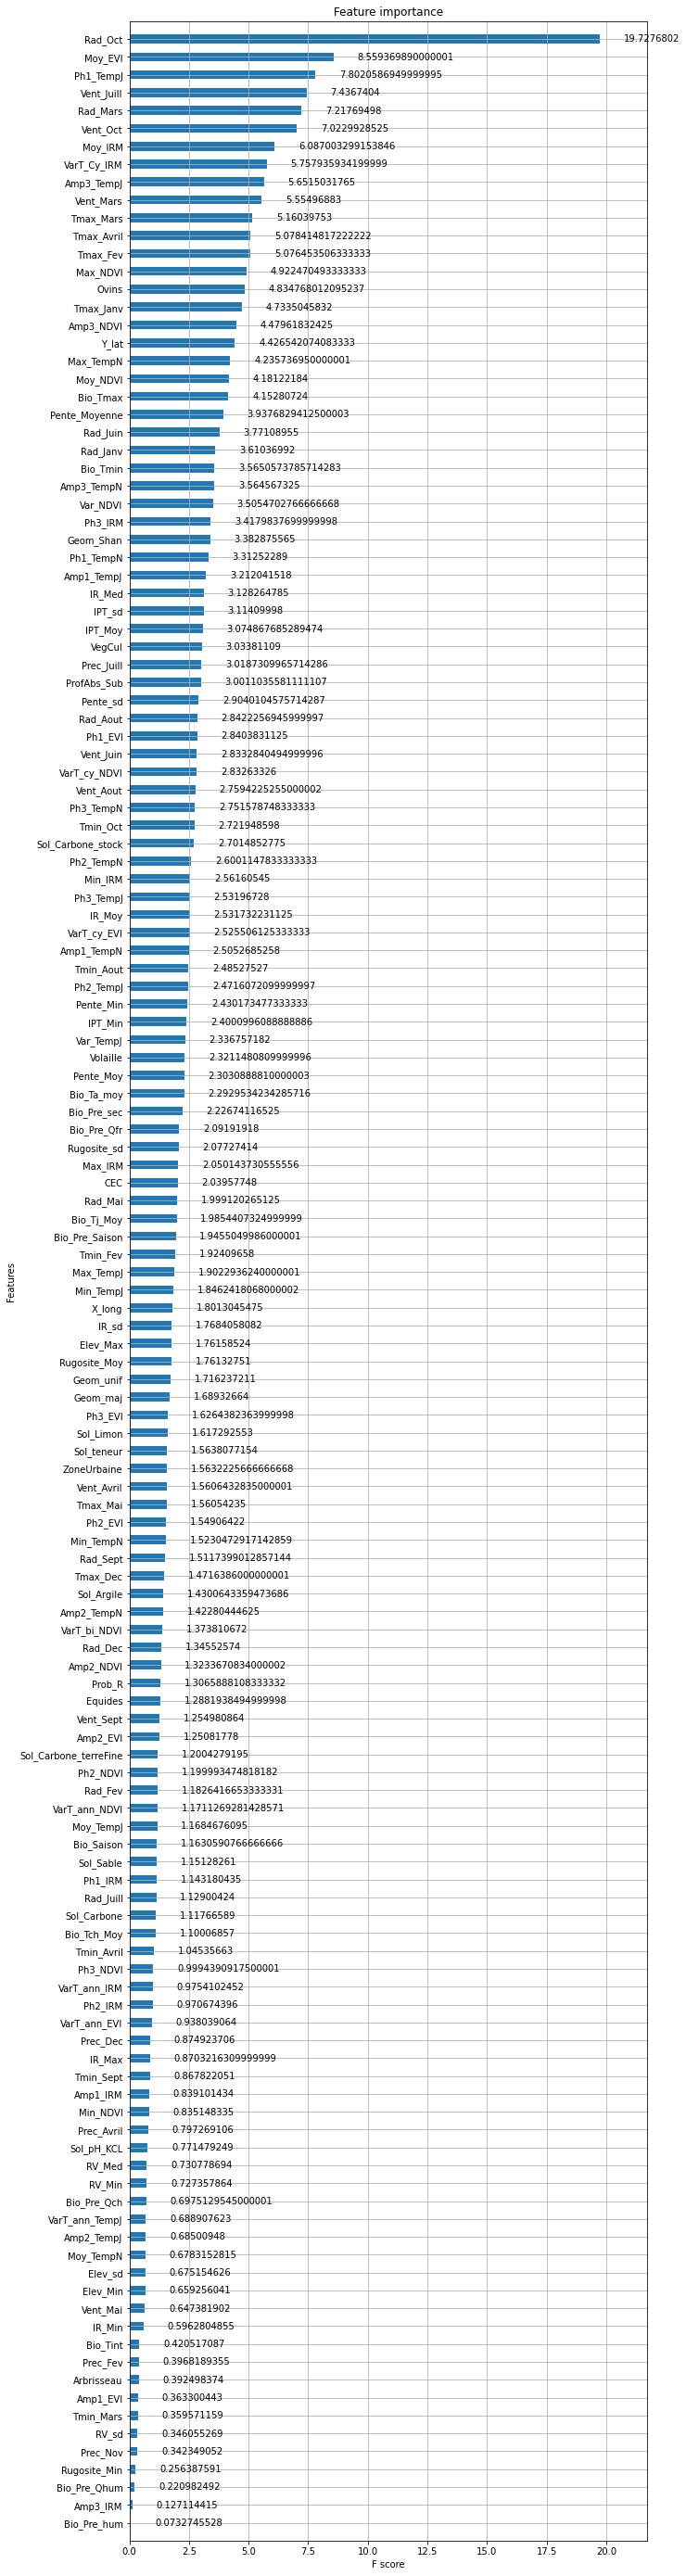

{'Amp3_TempJ': 5.6515031765, 'Ovins': 4.834768012095237, 'Ph1_TempJ': 7.8020586949999995, 'Volaille': 2.3211480809999996, 'Moy_IRM': 6.087003299153846, 'Tmax_Fev': 5.076453506333333, 'Sol_Argile': 1.4300643359473686, 'Moy_EVI': 8.559369890000001, 'IPT_Moy': 3.074867685289474, 'Ph3_EVI': 1.6264382363999998, 'Amp1_TempJ': 3.212041518, 'Vent_Oct': 7.0229928525, 'Amp1_TempN': 2.5052685258, 'Tmax_Avril': 5.078414817222222, 'Tmax_Mars': 5.16039753, 'Min_TempJ': 1.8462418068000002, 'Rad_Oct': 19.7276802, 'VarT_ann_TempJ': 0.688907623, 'Var_TempJ': 2.336757182, 'RV_Min': 0.727357864, 'Tmax_Janv': 4.7335045832, 'Prec_Juill': 3.0187309965714286, 'Bio_Tj_Moy': 1.9854407324999999, 'Equides': 1.2881938494999998, 'Max_TempN': 4.235736950000001, 'Rad_Juin': 3.77108955, 'Ph2_NDVI': 1.199993474818182, 'Var_NDVI': 3.5054702766666668, 'Max_NDVI': 4.922470493333333, 'Pente_sd': 2.9040104575714287, 'ProfAbs_Sub': 3.0011035581111107, 'Amp3_NDVI': 4.47961832425, 'VarT_Cy_IRM': 5.757935934199999, 'Ph1_IRM': 1

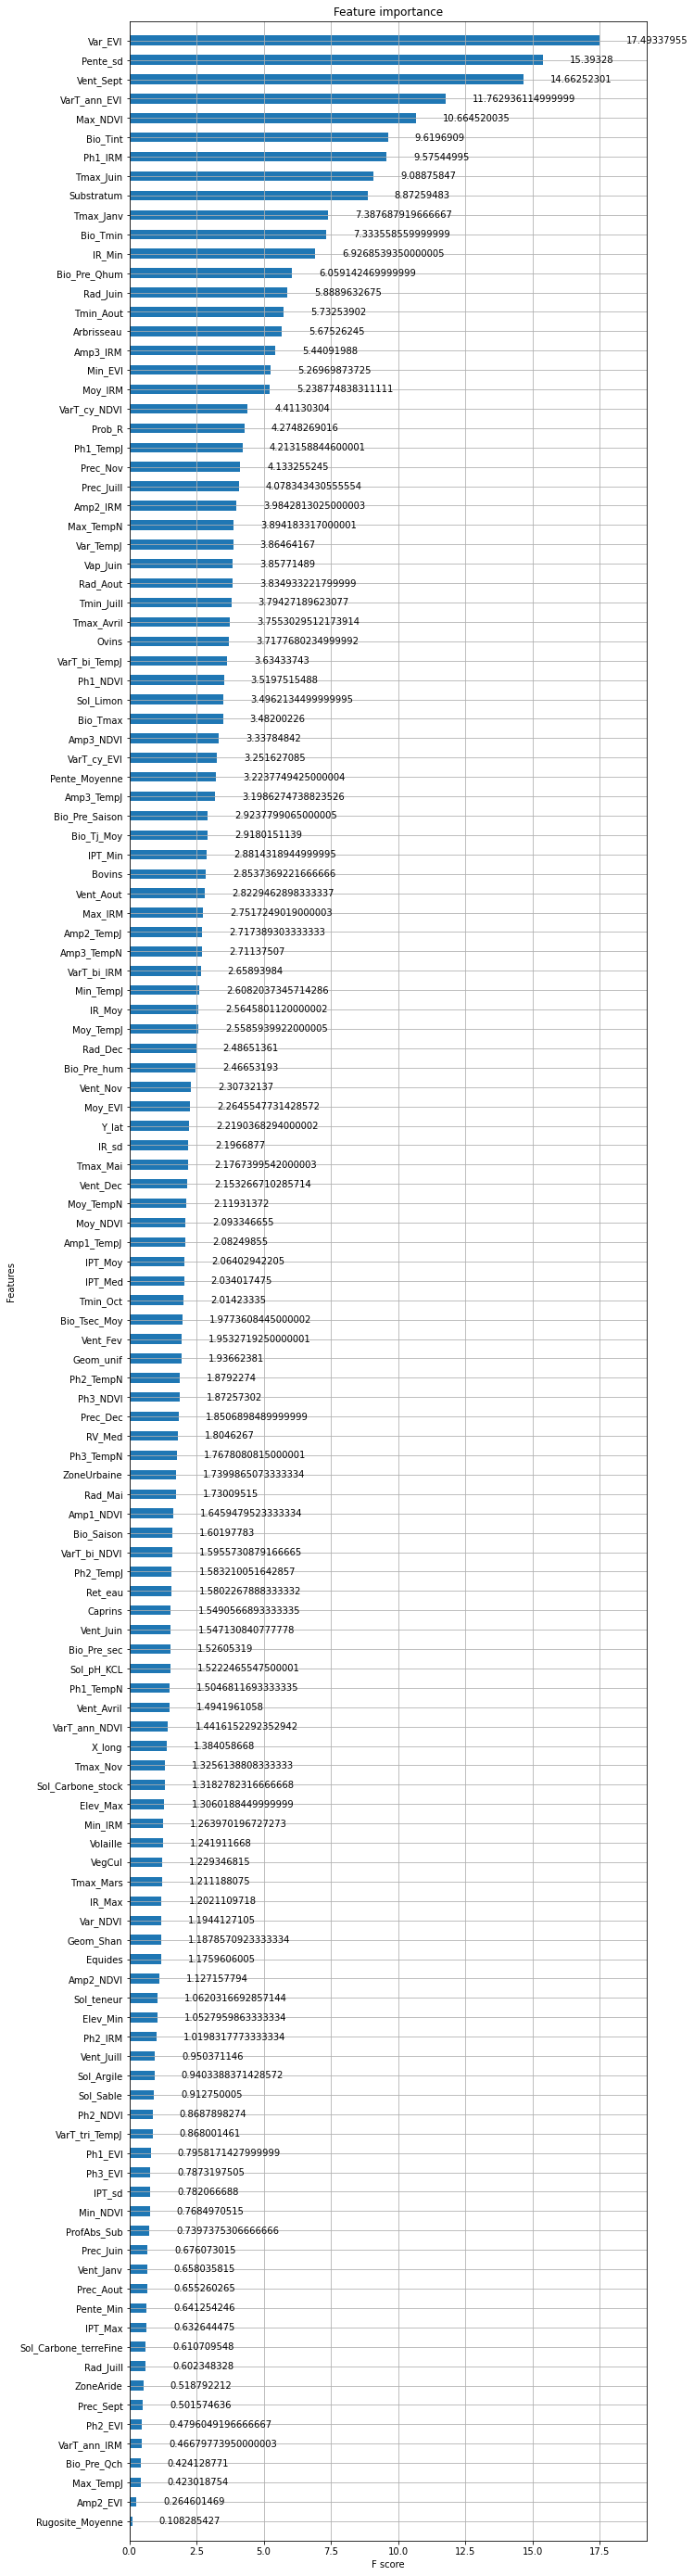

{'Vent_Sept': 14.66252301, 'Tmax_Janv': 7.387687919666667, 'Tmax_Avril': 3.7553029512173914, 'Pente_sd': 15.39328, 'Ph1_TempJ': 4.213158844600001, 'Bio_Tmin': 7.333558559999999, 'Var_EVI': 17.49337955, 'Bio_Pre_Saison': 2.9237799065000005, 'Rad_Juin': 5.8889632675, 'Prob_R': 4.2748269016, 'Sol_Limon': 3.4962134499999995, 'VarT_ann_EVI': 11.762936114999999, 'Amp3_TempJ': 3.1986274738823526, 'Min_TempJ': 2.6082037345714286, 'Vent_Dec': 2.153266710285714, 'Max_NDVI': 10.664520035, 'Max_TempN': 3.894183317000001, 'IPT_Moy': 2.06402942205, 'Ph1_IRM': 9.57544995, 'Max_IRM': 2.7517249019000003, 'Tmin_Juill': 3.79427189623077, 'Arbrisseau': 5.67526245, 'Moy_IRM': 5.238774838311111, 'Ph1_NDVI': 3.5197515488, 'Bio_Tj_Moy': 2.9180151139, 'Amp3_TempN': 2.71137507, 'Prec_Juill': 4.078343430555554, 'Tmax_Juin': 9.08875847, 'IR_Min': 6.9268539350000005, 'IPT_Min': 2.8814318944999995, 'Amp2_IRM': 3.9842813025000003, 'Y_lat': 2.2190368294000002, 'Ph2_TempJ': 1.583210051642857, 'Substratum': 8.87259483,

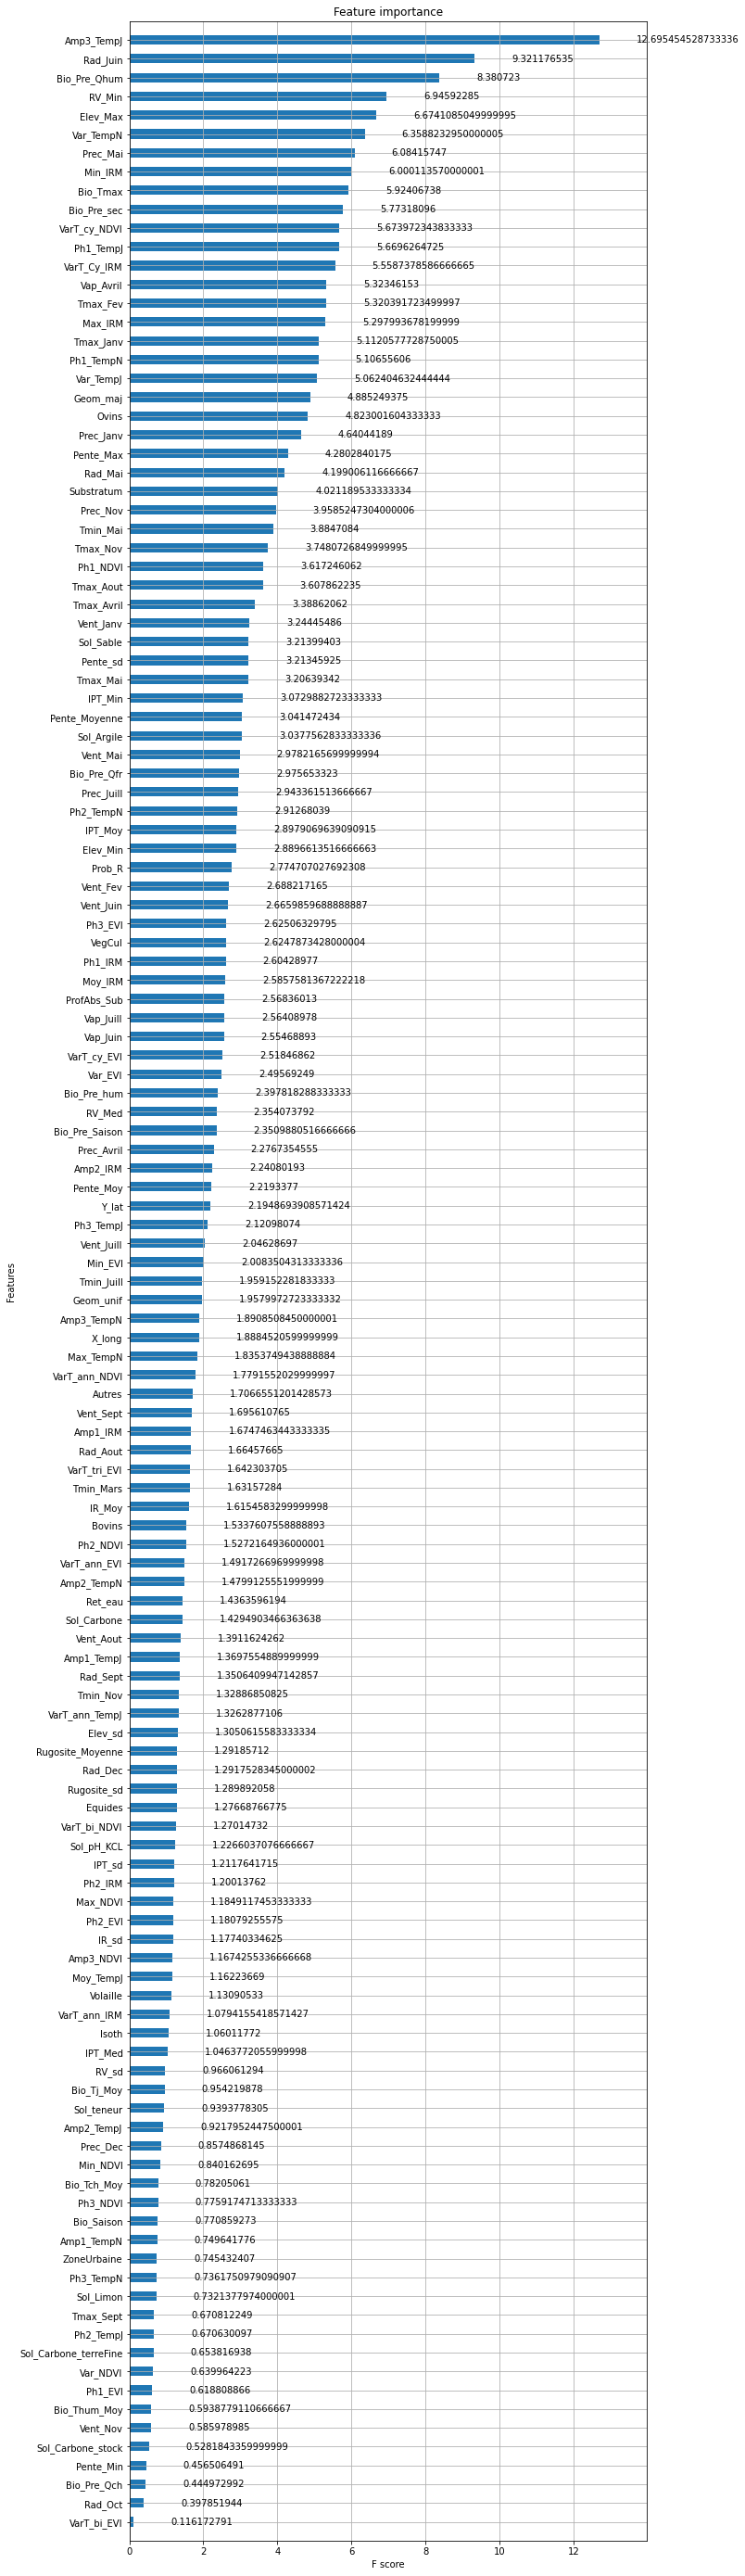

{'Amp3_TempJ': 12.695454528733336, 'Ovins': 4.823001604333333, 'Ph1_TempJ': 5.6696264725, 'Var_TempJ': 5.062404632444444, 'Tmax_Fev': 5.320391723499997, 'Ph2_TempN': 2.91268039, 'Max_IRM': 5.297993678199999, 'Elev_Max': 6.6741085049999995, 'Ph3_EVI': 2.62506329795, 'Moy_IRM': 2.5857581367222218, 'Pente_Moyenne': 3.041472434, 'Bio_Pre_Qfr': 2.975653323, 'Var_TempN': 6.3588232950000005, 'Geom_maj': 4.885249375, 'Geom_unif': 1.9579972723333332, 'IPT_Moy': 2.8979069639090915, 'Ph1_TempN': 5.10655606, 'Pente_Max': 4.2802840175, 'Y_lat': 2.1948693908571424, 'Rad_Juin': 9.321176535, 'Tmax_Janv': 5.1120577728750005, 'Ret_eau': 1.4363596194, 'Min_IRM': 6.000113570000001, 'Bio_Pre_Qhum': 8.380723, 'Ph1_NDVI': 3.617246062, 'Tmin_Mai': 3.8847084, 'Prob_R': 2.774707027692308, 'RV_Min': 6.94592285, 'VarT_Cy_IRM': 5.5587378586666665, 'Vent_Sept': 1.695610765, 'Amp3_TempN': 1.8908508450000001, 'VarT_cy_NDVI': 5.673972343833333, 'Elev_Min': 2.8896613516666663, 'Vent_Fev': 2.688217165, 'Sol_Argile': 3.0

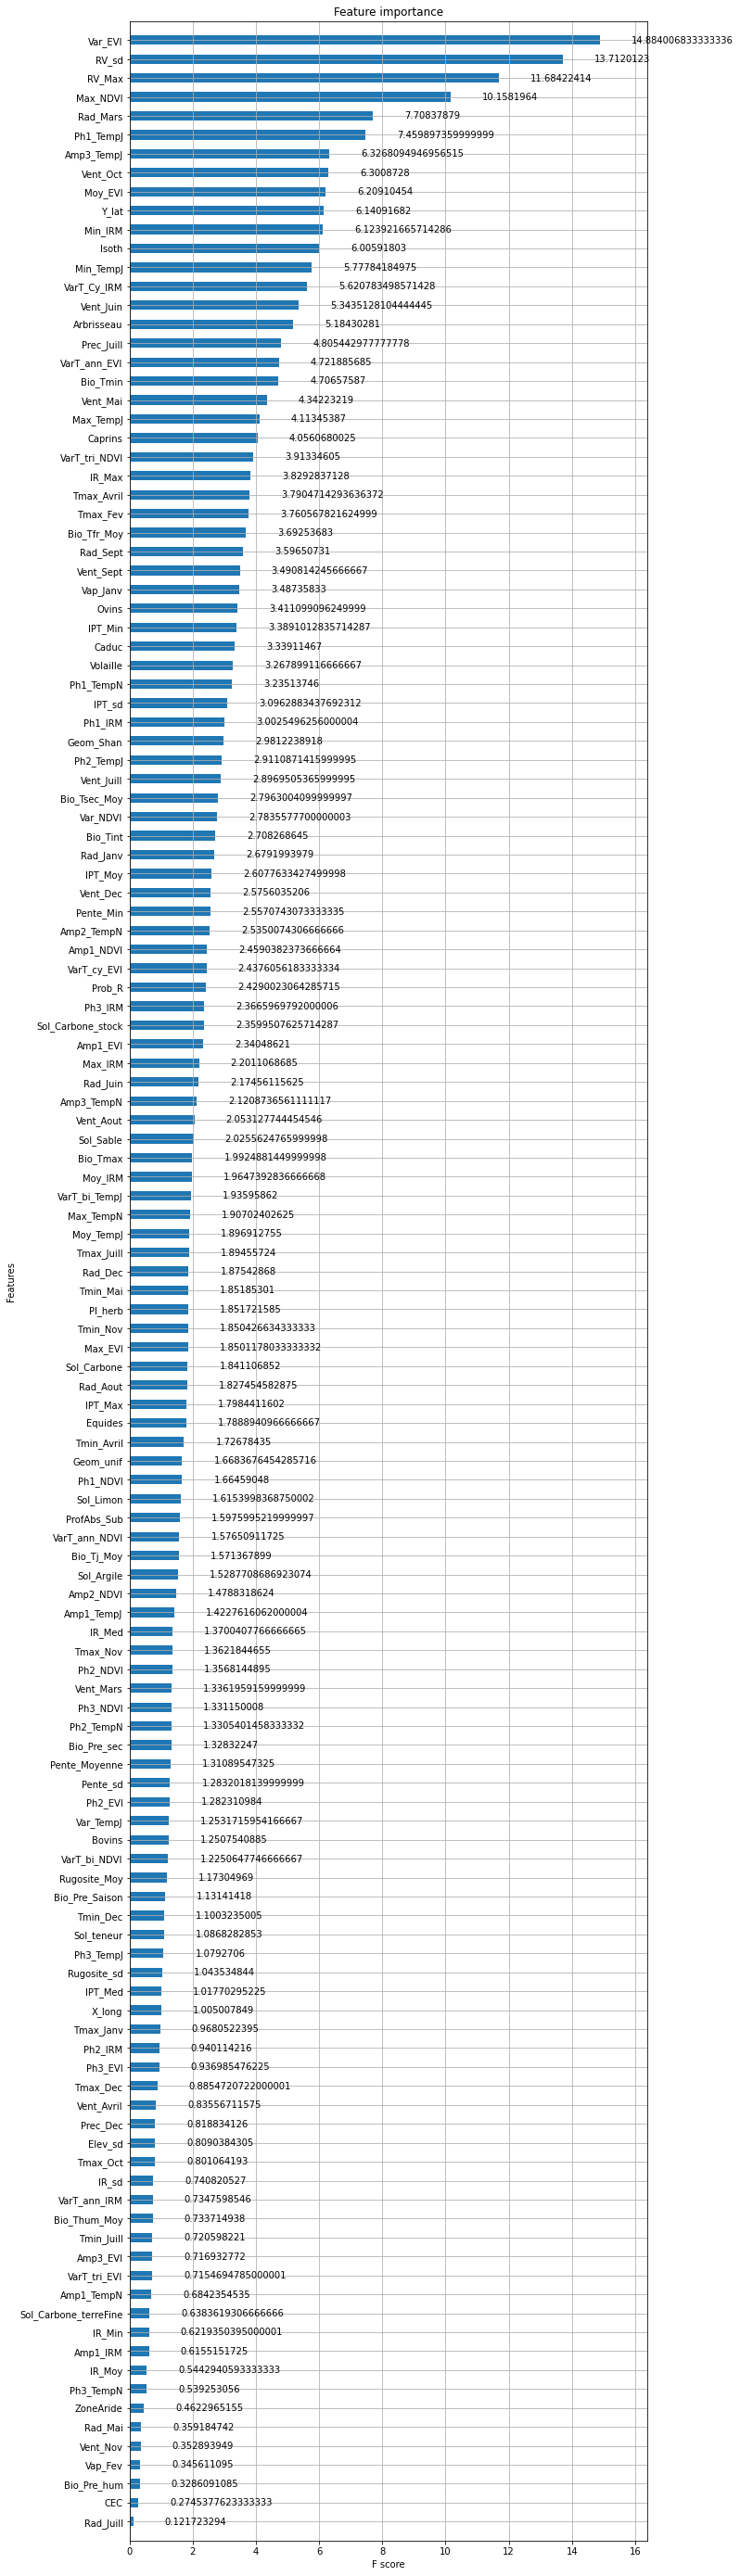

{'Amp3_TempJ': 6.3268094946956515, 'Min_TempJ': 5.77784184975, 'Amp1_NDVI': 2.4590382373666664, 'Vent_Oct': 6.3008728, 'Var_EVI': 14.884006833333336, 'Amp3_TempN': 2.1208736561111117, 'RV_Max': 11.68422414, 'Sol_Carbone_stock': 2.3599507625714287, 'Rad_Juin': 2.17456115625, 'Geom_Shan': 2.9812238918, 'RV_sd': 13.7120123, 'Vent_Mai': 4.34223219, 'VarT_Cy_IRM': 5.620783498571428, 'Ph1_TempJ': 7.459897359999999, 'Vent_Dec': 2.5756035206, 'Ph2_TempN': 1.3305401458333332, 'Max_NDVI': 10.1581964, 'Vent_Juill': 2.8969505365999995, 'Tmax_Fev': 3.760567821624999, 'Min_IRM': 6.123921665714286, 'Tmax_Avril': 3.7904714293636372, 'Ovins': 3.411099096249999, 'Prec_Juill': 4.805442977777778, 'VarT_ann_EVI': 4.721885685, 'ZoneAride': 0.4622965155, 'Bio_Tsec_Moy': 2.7963004099999997, 'Tmax_Juill': 1.89455724, 'Ph1_IRM': 3.0025496256000004, 'Bovins': 1.2507540885, 'Y_lat': 6.14091682, 'Rad_Mars': 7.70837879, 'Max_IRM': 2.2011068685, 'Caprins': 4.0560680025, 'Prob_R': 2.4290023064285715, 'IPT_sd': 3.0962

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import SVC

classifiers = {
    "XGBClassifier": XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=3,n_estimators=100)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC

my_scorer1 = make_scorer(tp1, greater_is_better=True)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    for i, (train, test) in enumerate(cv.split(X1, y1)):
         model=clf.fit(X1.loc[train,], y1.loc[train,])
         fig, ax = plt.subplots(figsize=(10,50))
         xgb.plot_importance(model, max_num_features=250, height=0.5, ax=ax,importance_type='gain')
         plt.show() 
         #######       
         #Available importance_types = [‘weight’, ‘gain’, ‘cover’, ‘total_gain’, ‘total_cover’]
         f = 'gain'
         print(model.get_booster().get_score(importance_type= f))   
         #######  
    #evaluate model
    scores = cross_val_score(clf, X1, y1, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, X1, y1, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf, X1, y1, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, X1, y1, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, X1, y1, scoring=my_scorer1, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))

In [ ]:
lst = ["X_long","Y_lat","Bovins","Volaille","Caprins","Ovins","Equides","Coniferes",'ZoneAride','ZonePel','Lesfeuillus','Caduc','Autres','Arbrisseau','Pl_herb','VegCul','VegInond','ZoneUrbaine','Moy_IRM','Amp1_IRM','Amp2_IRM','Amp3_IRM','VarT_ann_IRM','VarT_bi_IRM','VarT_tri_IRM','VarT_Cy_IRM','Min_IRM','Max_IRM','Ph1_IRM','Ph2_IRM','Ph3_IRM','Var_IRM','Moy_TempJ','Amp1_TempJ','Amp2_TempJ','Amp3_TempJ','VarT_ann_TempJ','VarT_bi_TempJ','VarT_cy_TempJ','Min_TempJ','Max_TempJ','Ph1_TempJ','Ph2_TempJ','Ph3_TempJ','Var_TempJ','Moy_TempN','Amp1_TempN','Amp2_TempN','Amp3_TempN','VarT_ann_TempN','VarT_bi_TempN','VarT_tri_TempN','VarT_cy_TempN','Min_TempN','Max_TempN','Ph1_TempN','Ph2_TempN','Ph3_TempN','Var_TempN','Moy_NDVI','Amp1_NDVI','Amp2_NDVI','Amp3_NDVI','VarT_ann_NDVI','VarT_bi_NDVI','VarT_tri_NDVI','VarT_cy_NDVI','Min_NDVI','Max_NDVI','Ph1_NDVI','Ph2_NDVI','Ph3_NDVI','Var_NDVI','Moy_EVI','Amp1_EVI','Amp2_EVI','Amp3_EVI','VarT_ann_EVI','VarT_bi_EVI','VarT_tri_EVI','VarT_cy_EVI','Min_EVI','Max_EVI','Ph1_EVI','Ph2_EVI','Ph3_EVI','Var_EVI','Ret_eau','Sol_teneur','Substratum','Prob_R','ProfAbs_Sub','CEC+Sol_Argile','Sol_Carbone','Sol_Carbone_stock','Sol_Carbone_terreFine','Sol_pH_KCL','Sol_Limon','Sol_Sable','Elev_Max','Elev_Moyenne','Elev_Min','Elev_Moy','Elev_sd','Geom_maj','Geom_Shan','Geom_unif','Rugosite_Max','Rugosite_Moyenne','Rugosite_Min','Rugosite_Moy','Rugosite_sd','Pente_Max','Pente_Moyenne','Pente_Min','Pente_Moy','Pente_sd','IPT_Max','IPT_Med','IPT_Min','IPT_Moy','IPT_sd','IR_Max','IR_Med','IR_Min','IR_Moy','IR_sd','RV_Max','RV_Med','RV_Min','RV_Moy','RV_sd','Bio_Ta_moy','Bio_Tj_Moy','Isoth','Bio_Saison','Bio_Tmax','Bio_Tmin','Bio_Tint','Bio_Thum_Moy','Bio_Tsec_Moy','Bio_Tch_Moy','Bio_Tfr_Moy','Bio_Pre_Ann','Bio_Pre_hum','Bio_Pre_sec','Bio_Pre_Saison','Bio_Pre_Qhum','Bio_Pre_Qsec','Bio_Pre_Qch','Bio_Pre_Qfr','Prec_Janv','Prec_Fev','Prec_Mars','Prec_Avril','Prec_Mai','Prec_Juin','Prec_Juill','Prec_Aout','Prec_Sept','Prec_Oct','Prec_Nov','Prec_Dec','Rad_Janv','Rad_Fev','Rad_Mars','Rad_Avril','Rad_Mai','Rad_Juin','Rad_Juill','Rad_Aout','Rad_Sept','Rad_Oct','Rad_Nov','Rad_Dec','Tmax_Janv','Tmax_Fev','Tmax_Mars','Tmax_Avril','Tmax_Mai','Tmax_Juin','Tmax_Juill','Tmax_Aout','Tmax_Sept','Tmax_Oct','Tmax_Nov','Tmax_Dec','Tmin_Janv','Tmin_Fev','Tmin_Mars','Tmin_Avril','Tmin_Mai','Tmin_Juin','Tmin_Juill','Tmin_Aout','Tmin_Sept','Tmin_Oct','Tmin_Nov','Tmin_Dec','Vap_Janv','Vap_Fev','Vap_Mars','Vap_Avril','Vap_Mai','Vap_Juin','Vap_Juill','Vap_Aout','Vap_Sept','Vap_Oct','Vap_Nov','Vap_Dec','Vent_Janv','Vent_Fev','Vent_Mars','Vent_Avril','Vent_Mai','Vent_Juin','Vent_Juill','Vent_Aout','Vent_Sept','Vent_Oct','Vent_Nov','Vent_Dec']

In [ ]:
lst1={'Amp3_TempJ': 9.053425735000001, 'Moy_TempJ': 8.735890400833332, 'Vent_Dec': 3.18804170225, 'Tmax_Fev': 8.673904367125, 'Ph2_NDVI': 5.259548852, 'Ovins': 2.5038790116875, 'Tmax_Janv': 4.6983143235, 'Moy_IRM': 5.694954124999999, 'VarT_bi_TempJ': 3.966530132, 'Ph1_IRM': 1.7543550728, 'Moy_EVI': 9.28178787, 'IPT_Moy': 2.9529183222222226, 'Y_lat': 9.5324403075, 'Max_TempJ': 3.1209667926, 'Min_EVI': 1.2872276703333334, 'Rad_Aout': 3.7177088285, 'Ph2_TempJ': 3.3520803869999996, 'Tmin_Fev': 4.386926368888889, 'Tmax_Avril': 3.007049969428572, 'IPT_Min': 4.0670395475, 'Prob_R': 2.6131721473500003, 'Max_IRM': 10.0633049, 'Vap_Fev': 5.69019985, 'VarT_bi_NDVI': 2.6984051449999997, 'VarT_ann_NDVI': 2.6385991741428576, 'Tmin_Juill': 4.4372491262, 'Ph1_NDVI': 0.8063851604900001, 'VarT_ann_TempJ': 2.884302201, 'Rugosite_sd': 4.209156038, 'Prec_Juill': 3.3284118090000003, 'Bio_Tmax': 8.08395815, 'ProfAbs_Sub': 2.637302335333333, 'Bovins': 0.5682499412500001, 'Ph2_EVI': 3.2342772810909093, 'Ph2_TempN': 5.78996897, 'Amp1_IRM': 1.5372383744885714, 'Ph3_EVI': 2.1005530763333335, 'Moy_NDVI': 5.70897198, 'Bio_Tch_Moy': 5.452749093333334, 'Amp2_TempN': 1.87748788, 'Amp3_TempN': 2.7070296760000003, 'VarT_cy_TempN': 7.48475957, 'Sol_pH_KCL': 1.7778265924999999, 'Amp2_NDVI': 2.935726563333333, 'Bio_Ta_moy': 1.6412086466666667, 'VegCul': 2.0518680781666663, 'Vent_Aout': 2.85959680475, 'VarT_tri_NDVI': 4.8897260425, 'Sol_Sable': 1.615012356125, 'Amp2_EVI': 3.05355072, 'Vent_Juin': 3.2060751924999997, 'Amp2_TempJ': 2.0996012092500003, 'Rad_Avril': 2.56325128775, 'Bio_Thum_Moy': 1.1533086295000001, 'IR_Moy': 1.4898632840833332, 'Sol_Argile': 2.1718918486666667, 'Min_TempN': 3.923841953333333, 'IR_Max': 3.22420216, 'Amp1_TempJ': 2.3216045985, 'Tmin_Aout': 2.1181789461428573, 'Tmax_Mai': 0.446380615, 'Sol_Carbone': 0.8847872062857142, 'Sol_teneur': 2.24336974, 'IPT_Med': 1.09440841475, 'VarT_bi_EVI': 1.8036335296666666, 'Pente_Min': 0.95300895, 'Elev_sd': 1.783914591888889, 'CEC': 2.17747259, 'Amp1_TempN': 1.9246793566666665, 'Tmin_Dec': 3.618005395, 'Sol_Carbone_terreFine': 1.818201322, 'Min_TempJ': 1.936279635, 'IPT_Max': 2.4470645018571426, 'Max_NDVI': 3.00541019, 'Bio_Tint': 1.0706220453333333, 'Pente_Moyenne': 2.536995672, 'X_long': 1.9675733266666668, 'Pente_sd': 1.6500564953333332, 'Tmin_Oct': 1.73406726, 'VarT_cy_NDVI': 0.979785442, 'Tmin_Nov': 2.49608111, 'Min_IRM': 1.1838587308571429, 'Bio_Pre_Qhum': 2.85782695, 'Tmax_Juin': 2.18194747, 'Sol_Limon': 1.8170445, 'Amp1_EVI': 2.10317786075, 'Vent_Mai': 1.8613092500000004, 'Ph1_TempN': 3.69210577, 'Ph1_EVI': 0.8117876055, 'VarT_bi_IRM': 2.3395462, 'VarT_cy_EVI': 4.05083561, 'Vap_Dec': 2.04367161, 'Amp1_NDVI': 1.6240862895000001, 'Ret_eau': 0.8101818576666666, 'Rad_Janv': 1.9434434450000002, 'Equides': 0.762457907, 'Rad_Oct': 1.8314700933333334, 'Vent_Fev': 1.191584945, 'Ph1_TempJ': 1.160565588285714, 'Bio_Tsec_Moy': 0.6934528649999999, 'Amp2_IRM': 1.3969791603333332, 'Amp3_EVI': 1.03328526, 'Tmax_Dec': 1.20337033, 'Isoth': 0.28012681, 'Rad_Dec': 1.64247608, 'Vent_Mars': 1.4309709984999999, 'Elev_Min': 0.7419739550000001, 'Sol_Carbone_stock': 1.56091332, 'Geom_unif': 1.044827997, 'IR_Med': 1.1102394755, 'IR_sd': 0.9440754663333334, 'Bio_Tj_Moy': 1.244747995, 'Ph3_NDVI': 1.13891983, 'Rad_Sept': 0.978938997, 'Vent_Juill': 0.160810828, 'Vent_Nov': 1.286966621, 'Bio_Tmin': 0.46415031, 'Amp3_NDVI': 0.944152653, 'Vent_Avril': 1.4950738, 'VarT_tri_EVI': 0.97103858, 'Var_EVI': 1.03189099, 'Vent_Oct': 0.46332252, 'ZoneUrbaine': 0.130299911, 'Ph3_IRM': 0.908618629, 'Volaille': 0.7203779616666667, 'Max_TempN': 0.36500399299999997, 'VarT_ann_IRM': 0.686622292, 'Bio_Pre_hum': 0.756707907, 'Geom_maj': 0.6343782245, 'Elev_Max': 1.06544757, 'Rugosite_Max': 0.923452199, 'Rugosite_Moyenne': 0.481262594, 'Max_EVI': 0.818253279}


In [ ]:
import pandas as pd
P=pd.DataFrame(list(lst1.items()),
                   columns=['variable', 'importance 1'])

In [ ]:
for var in lst :
    if var in lst1:
     print("important")
     print(var)
    else:
        print(0)
        print(var)
        P=P.append({"variable" : var , 'importance 1' : 0} , ignore_index=True)

important
X_long
important
Y_lat
important
Bovins
important
Volaille
0
Caprins
important
Ovins
important
Equides
0
Coniferes
0
ZoneAride
0
ZonePel
0
Lesfeuillus
0
Caduc
0
Autres
0
Arbrisseau
0
Pl_herb
important
VegCul
0
VegInond
important
ZoneUrbaine
important
Moy_IRM
important
Amp1_IRM
important
Amp2_IRM
0
Amp3_IRM
important
VarT_ann_IRM
important
VarT_bi_IRM
0
VarT_tri_IRM
0
VarT_Cy_IRM
important
Min_IRM
important
Max_IRM
important
Ph1_IRM
0
Ph2_IRM
important
Ph3_IRM
0
Var_IRM
important
Moy_TempJ
important
Amp1_TempJ
important
Amp2_TempJ
important
Amp3_TempJ
important
VarT_ann_TempJ
important
VarT_bi_TempJ
0
VarT_cy_TempJ
important
Min_TempJ
important
Max_TempJ
important
Ph1_TempJ
important
Ph2_TempJ
0
Ph3_TempJ
0
Var_TempJ
0
Moy_TempN
important
Amp1_TempN
important
Amp2_TempN
important
Amp3_TempN
0
VarT_ann_TempN
0
VarT_bi_TempN
0
VarT_tri_TempN
important
VarT_cy_TempN
important
Min_TempN
important
Max_TempN
important
Ph1_TempN
important
Ph2_TempN
0
Ph3_TempN
0
Var_TempN
important
M

In [ ]:
P

,variable,importance 1
0,Amp3_TempJ,9.053426
1,Moy_TempJ,8.735890
2,Vent_Dec,3.188042
3,Tmax_Fev,8.673904
4,Ph2_NDVI,5.259549
...,...,...
220,Vap_Sept,0.000000
221,Vap_Oct,0.000000
222,Vap_Nov,0.000000
223,Vent_Janv,0.000000


In [ ]:
P.to_excel(r'cv1.xlsx', index = False)

In [ ]:
lst2={'Amp3_TempJ': 5.6515031765, 'Ovins': 4.834768012095237, 'Ph1_TempJ': 7.8020586949999995, 'Volaille': 2.3211480809999996, 'Moy_IRM': 6.087003299153846, 'Tmax_Fev': 5.076453506333333, 'Sol_Argile': 1.4300643359473686, 'Moy_EVI': 8.559369890000001, 'IPT_Moy': 3.074867685289474, 'Ph3_EVI': 1.6264382363999998, 'Amp1_TempJ': 3.212041518, 'Vent_Oct': 7.0229928525, 'Amp1_TempN': 2.5052685258, 'Tmax_Avril': 5.078414817222222, 'Tmax_Mars': 5.16039753, 'Min_TempJ': 1.8462418068000002, 'Rad_Oct': 19.7276802, 'VarT_ann_TempJ': 0.688907623, 'Var_TempJ': 2.336757182, 'RV_Min': 0.727357864, 'Tmax_Janv': 4.7335045832, 'Prec_Juill': 3.0187309965714286, 'Bio_Tj_Moy': 1.9854407324999999, 'Equides': 1.2881938494999998, 'Max_TempN': 4.235736950000001, 'Rad_Juin': 3.77108955, 'Ph2_NDVI': 1.199993474818182, 'Var_NDVI': 3.5054702766666668, 'Max_NDVI': 4.922470493333333, 'Pente_sd': 2.9040104575714287, 'ProfAbs_Sub': 3.0011035581111107, 'Amp3_NDVI': 4.47961832425, 'VarT_Cy_IRM': 5.757935934199999, 'Ph1_IRM': 1.143180435, 'Sol_Carbone_stock': 2.7014852775, 'Vent_Aout': 2.7594225255000002, 'Rad_Aout': 2.8422256945999997, 'Prec_Nov': 0.342349052, 'Amp3_TempN': 3.564567325, 'Bio_Tmin': 3.5650573785714283, 'Y_lat': 4.426542074083333, 'Rad_Mars': 7.21769498, 'Max_IRM': 2.050143730555556, 'IR_Moy': 2.531732231125, 'Bio_Pre_Saison': 1.9455049986000001, 'VarT_cy_EVI': 2.525506125333333, 'Tmin_Aout': 2.48527527, 'Moy_NDVI': 4.18122184, 'Ph1_TempN': 3.31252289, 'Sol_teneur': 1.5638077154, 'Ph1_EVI': 2.8403831125, 'IPT_Min': 2.4000996088888886, 'Ph3_IRM': 3.4179837699999998, 'Bio_Ta_moy': 2.2929534234285716, 'Vent_Juill': 7.4367404, 'IR_Med': 3.128264785, 'Pente_Moyenne': 3.9376829412500003, 'Pente_Moy': 2.3030888810000003, 'Rad_Sept': 1.5117399012857144, 'Pente_Min': 2.430173477333333, 'Rad_Mai': 1.999120265125, 'Tmin_Oct': 2.721948598, 'Vent_Mars': 5.55496883, 'IR_sd': 1.7684058082, 'IR_Max': 0.8703216309999999, 'Vent_Juin': 2.8332840494999996, 'Geom_unif': 1.716237211, 'Bio_Tmax': 4.15280724, 'Geom_Shan': 3.382875565, 'Ph3_TempN': 2.751578748333333, 'VarT_ann_NDVI': 1.1711269281428571, 'Rad_Janv': 3.61036992, 'Rugosite_Moy': 1.76132751, 'Rad_Dec': 1.34552574, 'Max_TempJ': 1.9022936240000001, 'IPT_sd': 3.11409998, 'Ph2_TempN': 2.6001147833333333, 'Rad_Fev': 1.1826416653333331, 'Vent_Avril': 1.5606432835000001, 'Ph3_TempJ': 2.53196728, 'Geom_maj': 1.68932664, 'Ph2_TempJ': 2.4716072099999997, 'Amp2_TempJ': 0.68500948, 'Amp2_TempN': 1.42280444625, 'Sol_Limon': 1.617292553, 'Min_TempN': 1.5230472917142859, 'VarT_cy_NDVI': 2.83263326, 'Sol_Carbone_terreFine': 1.2004279195, 'Amp2_NDVI': 1.3233670834000002, 'VegCul': 3.03381109, 'X_long': 1.8013045475, 'Rugosite_sd': 2.07727414, 'VarT_bi_NDVI': 1.373810672, 'Bio_Pre_sec': 2.22674116525, 'Prec_Fev': 0.3968189355, 'CEC': 2.03957748, 'Bio_Pre_Qfr': 2.09191918, 'Min_IRM': 2.56160545, 'Ph3_NDVI': 0.9994390917500001, 'Prec_Dec': 0.874923706, 'Moy_TempJ': 1.1684676095, 'Vent_Sept': 1.254980864, 'Ph2_EVI': 1.54906422, 'Tmin_Fev': 1.92409658, 'Tmax_Dec': 1.4716386000000001, 'ZoneUrbaine': 1.5632225666666668, 'Prob_R': 1.3065888108333332, 'Elev_sd': 0.675154626, 'Rugosite_Min': 0.256387591, 'Bio_Saison': 1.1630590766666666, 'Amp1_EVI': 0.363300443, 'Amp3_IRM': 0.127114415, 'VarT_ann_IRM': 0.9754102452, 'Sol_Sable': 1.15128261, 'Amp2_EVI': 1.25081778, 'Bio_Pre_Qch': 0.6975129545000001, 'Tmax_Mai': 1.56054235, 'Bio_Tch_Moy': 1.10006857, 'Sol_Carbone': 1.11766589, 'Prec_Avril': 0.797269106, 'Tmin_Mars': 0.359571159, 'Rad_Juill': 1.12900424, 'Amp1_IRM': 0.839101434, 'Elev_Max': 1.76158524, 'Ph2_IRM': 0.970674396, 'Sol_pH_KCL': 0.771479249, 'Min_NDVI': 0.835148335, 'Tmin_Sept': 0.867822051, 'Tmin_Avril': 1.04535663, 'VarT_ann_EVI': 0.938039064, 'Elev_Min': 0.659256041, 'Bio_Tint': 0.420517087, 'RV_sd': 0.346055269, 'Arbrisseau': 0.392498374, 'Moy_TempN': 0.6783152815, 'Vent_Mai': 0.647381902, 'IR_Min': 0.5962804855, 'RV_Med': 0.730778694, 'Bio_Pre_Qhum': 0.220982492, 'Bio_Pre_hum': 0.0732745528}


In [ ]:
P2=pd.DataFrame(list(lst2.items()),
                   columns=["variable", "importance 2"])

In [ ]:
P2

,variable,importance 2
0,Amp3_TempJ,5.651503
1,Ovins,4.834768
2,Ph1_TempJ,7.802059
3,Volaille,2.321148
4,Moy_IRM,6.087003
...,...,...
135,Vent_Mai,0.647382
136,IR_Min,0.596280
137,RV_Med,0.730779
138,Bio_Pre_Qhum,0.220982


In [ ]:
for var in lst :
    if var in lst2:
     print("important")
     print(var)
    else:
        print(0)
        print(var)
        P2=P2.append({"variable" : var , 'importance 2' : 0} , ignore_index=True)

important
X_long
important
Y_lat
0
Bovins
important
Volaille
0
Caprins
important
Ovins
important
Equides
0
Coniferes
0
ZoneAride
0
ZonePel
0
Lesfeuillus
0
Caduc
0
Autres
important
Arbrisseau
0
Pl_herb
important
VegCul
0
VegInond
important
ZoneUrbaine
important
Moy_IRM
important
Amp1_IRM
0
Amp2_IRM
important
Amp3_IRM
important
VarT_ann_IRM
0
VarT_bi_IRM
0
VarT_tri_IRM
important
VarT_Cy_IRM
important
Min_IRM
important
Max_IRM
important
Ph1_IRM
important
Ph2_IRM
important
Ph3_IRM
0
Var_IRM
important
Moy_TempJ
important
Amp1_TempJ
important
Amp2_TempJ
important
Amp3_TempJ
important
VarT_ann_TempJ
0
VarT_bi_TempJ
0
VarT_cy_TempJ
important
Min_TempJ
important
Max_TempJ
important
Ph1_TempJ
important
Ph2_TempJ
important
Ph3_TempJ
important
Var_TempJ
important
Moy_TempN
important
Amp1_TempN
important
Amp2_TempN
important
Amp3_TempN
0
VarT_ann_TempN
0
VarT_bi_TempN
0
VarT_tri_TempN
0
VarT_cy_TempN
important
Min_TempN
important
Max_TempN
important
Ph1_TempN
important
Ph2_TempN
important
Ph3_TempN

In [ ]:
P2

,variable,importance 2
0,Amp3_TempJ,5.651503
1,Ovins,4.834768
2,Ph1_TempJ,7.802059
3,Volaille,2.321148
4,Moy_IRM,6.087003
...,...,...
220,Vap_Dec,0.000000
221,Vent_Janv,0.000000
222,Vent_Fev,0.000000
223,Vent_Nov,0.000000


In [ ]:
P2.to_excel(r'cv2.xlsx', index = False)

In [ ]:
lst3={'Vent_Sept': 14.66252301, 'Tmax_Janv': 7.387687919666667, 'Tmax_Avril': 3.7553029512173914, 'Pente_sd': 15.39328, 'Ph1_TempJ': 4.213158844600001, 'Bio_Tmin': 7.333558559999999, 'Var_EVI': 17.49337955, 'Bio_Pre_Saison': 2.9237799065000005, 'Rad_Juin': 5.8889632675, 'Prob_R': 4.2748269016, 'Sol_Limon': 3.4962134499999995, 'VarT_ann_EVI': 11.762936114999999, 'Amp3_TempJ': 3.1986274738823526, 'Min_TempJ': 2.6082037345714286, 'Vent_Dec': 2.153266710285714, 'Max_NDVI': 10.664520035, 'Max_TempN': 3.894183317000001, 'IPT_Moy': 2.06402942205, 'Ph1_IRM': 9.57544995, 'Max_IRM': 2.7517249019000003, 'Tmin_Juill': 3.79427189623077, 'Arbrisseau': 5.67526245, 'Moy_IRM': 5.238774838311111, 'Ph1_NDVI': 3.5197515488, 'Bio_Tj_Moy': 2.9180151139, 'Amp3_TempN': 2.71137507, 'Prec_Juill': 4.078343430555554, 'Tmax_Juin': 9.08875847, 'IR_Min': 6.9268539350000005, 'IPT_Min': 2.8814318944999995, 'Amp2_IRM': 3.9842813025000003, 'Y_lat': 2.2190368294000002, 'Ph2_TempJ': 1.583210051642857, 'Substratum': 8.87259483, 'Bio_Pre_Qhum': 6.059142469999999, 'Bio_Tint': 9.6196909, 'ZoneUrbaine': 1.7399865073333334, 'Amp3_IRM': 5.44091988, 'Ovins': 3.7177680234999992, 'Ph3_EVI': 0.7873197505, 'Bovins': 2.8537369221666666, 'Var_TempJ': 3.86464167, 'Ph2_NDVI': 0.8687898274, 'Pente_Moyenne': 3.2237749425000004, 'VarT_ann_NDVI': 1.4416152292352942, 'VarT_bi_TempJ': 3.63433743, 'VarT_cy_EVI': 3.251627085, 'Min_IRM': 1.263970196727273, 'Vent_Aout': 2.8229462898333337, 'Rad_Aout': 3.834933221799999, 'Prec_Nov': 4.133255245, 'Tmin_Aout': 5.73253902, 'Min_EVI': 5.26969873725, 'Tmax_Mai': 2.1767399542000003, 'Vap_Juin': 3.85771489, 'Bio_Tmax': 3.48200226, 'X_long': 1.384058668, 'Caprins': 1.5490566893333335, 'IR_Moy': 2.5645801120000002, 'IR_sd': 2.1966877, 'VarT_bi_NDVI': 1.5955730879166665, 'Amp3_NDVI': 3.33784842, 'VarT_cy_NDVI': 4.41130304, 'Vent_Avril': 1.4941961058, 'Moy_EVI': 2.2645547731428572, 'Vent_Nov': 2.30732137, 'Sol_pH_KCL': 1.5222465547500001, 'Moy_TempJ': 2.5585939922000005, 'Sol_Argile': 0.9403388371428572, 'Amp2_TempJ': 2.717389303333333, 'Ph1_EVI': 0.7958171427999999, 'IPT_Med': 2.034017475, 'Rugosite_Moyenne': 0.108285427, 'Ph1_TempN': 1.5046811693333335, 'Prec_Dec': 1.8506898489999999, 'Tmax_Nov': 1.3256138808333333, 'Rad_Mai': 1.73009515, 'VarT_bi_IRM': 2.65893984, 'Amp2_NDVI': 1.127157794, 'IR_Max': 1.2021109718, 'Ret_eau': 1.5802267888333332, 'Amp1_TempJ': 2.08249855, 'Vent_Fev': 1.9532719250000001, 'Tmin_Oct': 2.01423335, 'Moy_NDVI': 2.093346655, 'Moy_TempN': 2.11931372, 'Bio_Pre_hum': 2.46653193, 'Ph2_IRM': 1.0198317773333334, 'VarT_tri_TempJ': 0.868001461, 'Vent_Juin': 1.547130840777778, 'Sol_teneur': 1.0620316692857144, 'Elev_Max': 1.3060188449999999, 'Sol_Carbone_stock': 1.3182782316666668, 'Amp1_NDVI': 1.6459479523333334, 'Ph2_TempN': 1.8792274, 'Rad_Dec': 2.48651361, 'Bio_Pre_sec': 1.52605319, 'Geom_Shan': 1.1878570923333334, 'Ph3_TempN': 1.7678080815000001, 'VegCul': 1.229346815, 'Tmax_Mars': 1.211188075, 'Volaille': 1.241911668, 'Bio_Tsec_Moy': 1.9773608445000002, 'Ph3_NDVI': 1.87257302, 'Bio_Pre_Qch': 0.424128771, 'Var_NDVI': 1.1944127105, 'Geom_unif': 1.93662381, 'RV_Med': 1.8046267, 'Sol_Sable': 0.912750005, 'Equides': 1.1759606005, 'Prec_Aout': 0.655260265, 'Prec_Juin': 0.676073015, 'Bio_Saison': 1.60197783, 'ZoneAride': 0.518792212, 'IPT_sd': 0.782066688, 'Elev_Min': 1.0527959863333334, 'Min_NDVI': 0.7684970515, 'Sol_Carbone_terreFine': 0.610709548, 'Rad_Juill': 0.602348328, 'Max_TempJ': 0.423018754, 'ProfAbs_Sub': 0.7397375306666666, 'Prec_Sept': 0.501574636, 'Pente_Min': 0.641254246, 'Ph2_EVI': 0.4796049196666667, 'Vent_Juill': 0.950371146, 'Amp2_EVI': 0.264601469, 'Vent_Janv': 0.658035815, 'VarT_ann_IRM': 0.46679773950000003, 'IPT_Max': 0.632644475}



In [ ]:
P3=pd.DataFrame(list(lst3.items()),
                   columns=["variable", "importance 3"])

In [ ]:
for var in lst :
    if var in lst3:
     print("important")
     print(var)
    else:
        print(0)
        print(var)
        P3=P3.append({"variable" : var , 'importance 3' : 0} , ignore_index=True)

important
X_long
important
Y_lat
important
Bovins
important
Volaille
important
Caprins
important
Ovins
important
Equides
0
Coniferes
important
ZoneAride
0
ZonePel
0
Lesfeuillus
0
Caduc
0
Autres
important
Arbrisseau
0
Pl_herb
important
VegCul
0
VegInond
important
ZoneUrbaine
important
Moy_IRM
0
Amp1_IRM
important
Amp2_IRM
important
Amp3_IRM
important
VarT_ann_IRM
important
VarT_bi_IRM
0
VarT_tri_IRM
0
VarT_Cy_IRM
important
Min_IRM
important
Max_IRM
important
Ph1_IRM
important
Ph2_IRM
0
Ph3_IRM
0
Var_IRM
important
Moy_TempJ
important
Amp1_TempJ
important
Amp2_TempJ
important
Amp3_TempJ
0
VarT_ann_TempJ
important
VarT_bi_TempJ
0
VarT_cy_TempJ
important
Min_TempJ
important
Max_TempJ
important
Ph1_TempJ
important
Ph2_TempJ
0
Ph3_TempJ
important
Var_TempJ
important
Moy_TempN
0
Amp1_TempN
0
Amp2_TempN
important
Amp3_TempN
0
VarT_ann_TempN
0
VarT_bi_TempN
0
VarT_tri_TempN
0
VarT_cy_TempN
0
Min_TempN
important
Max_TempN
important
Ph1_TempN
important
Ph2_TempN
important
Ph3_TempN
0
Var_TempN
imp

In [ ]:
P3

,variable,importance 3
0,Vent_Sept,14.662523
1,Tmax_Janv,7.387688
2,Tmax_Avril,3.755303
3,Pente_sd,15.393280
4,Ph1_TempJ,4.213159
...,...,...
220,Vap_Nov,0.000000
221,Vap_Dec,0.000000
222,Vent_Mars,0.000000
223,Vent_Mai,0.000000


In [ ]:
P3.to_excel(r'cv3.xlsx', index = False)

In [ ]:
lst4={'Amp3_TempJ': 12.695454528733336, 'Ovins': 4.823001604333333, 'Ph1_TempJ': 5.6696264725, 'Var_TempJ': 5.062404632444444, 'Tmax_Fev': 5.320391723499997, 'Ph2_TempN': 2.91268039, 'Max_IRM': 5.297993678199999, 'Elev_Max': 6.6741085049999995, 'Ph3_EVI': 2.62506329795, 'Moy_IRM': 2.5857581367222218, 'Pente_Moyenne': 3.041472434, 'Bio_Pre_Qfr': 2.975653323, 'Var_TempN': 6.3588232950000005, 'Geom_maj': 4.885249375, 'Geom_unif': 1.9579972723333332, 'IPT_Moy': 2.8979069639090915, 'Ph1_TempN': 5.10655606, 'Pente_Max': 4.2802840175, 'Y_lat': 2.1948693908571424, 'Rad_Juin': 9.321176535, 'Tmax_Janv': 5.1120577728750005, 'Ret_eau': 1.4363596194, 'Min_IRM': 6.000113570000001, 'Bio_Pre_Qhum': 8.380723, 'Ph1_NDVI': 3.617246062, 'Tmin_Mai': 3.8847084, 'Prob_R': 2.774707027692308, 'RV_Min': 6.94592285, 'VarT_Cy_IRM': 5.5587378586666665, 'Vent_Sept': 1.695610765, 'Amp3_TempN': 1.8908508450000001, 'VarT_cy_NDVI': 5.673972343833333, 'Elev_Min': 2.8896613516666663, 'Vent_Fev': 2.688217165, 'Sol_Argile': 3.0377562833333336, 'Prec_Juill': 2.943361513666667, 'Bio_Tmax': 5.92406738, 'Tmin_Juill': 1.959152281833333, 'Min_EVI': 2.0083504313333336, 'Prec_Nov': 3.9585247304000006, 'Sol_Carbone': 1.4294903466363638, 'Max_NDVI': 1.1849117453333333, 'VarT_ann_IRM': 1.0794155418571427, 'Bio_Pre_hum': 2.397818288333333, 'Ph2_EVI': 1.18079255575, 'Ph3_TempN': 0.7361750979090907, 'Bovins': 1.5337607558888893, 'VegCul': 2.6247873428000004, 'Bio_Pre_sec': 5.77318096, 'Pente_Min': 0.456506491, 'Substratum': 4.021189533333334, 'X_long': 1.8884520599999999, 'Prec_Janv': 4.64044189, 'Rad_Mai': 4.199006116666667, 'Vap_Avril': 5.32346153, 'VarT_ann_NDVI': 1.7791552029999997, 'Prec_Mai': 6.08415747, 'Amp2_IRM': 2.24080193, 'Equides': 1.27668766775, 'Tmin_Nov': 1.32886850825, 'Vent_Aout': 1.3911624262, 'Tmax_Nov': 3.7480726849999995, 'Prec_Avril': 2.2767354555, 'ProfAbs_Sub': 2.56836013, 'Vent_Janv': 3.24445486, 'Ph2_NDVI': 1.5272164936000001, 'Ph2_IRM': 1.20013762, 'Bio_Tch_Moy': 0.78205061, 'Vent_Juin': 2.6659859688888887, 'Autres': 1.7066551201428573, 'Sol_Carbone_stock': 0.5281843359999999, 'Amp2_TempN': 1.4799125551999999, 'Max_TempN': 1.8353749438888884, 'Sol_Sable': 3.21399403, 'Bio_Pre_Saison': 2.3509880516666666, 'Elev_sd': 1.3050615583333334, 'Vent_Nov': 0.585978985, 'Tmax_Avril': 3.38862062, 'Vap_Juill': 2.56408978, 'IPT_Min': 3.0729882723333333, 'Vent_Mai': 2.9782165699999994, 'IPT_Med': 1.0463772055999998, 'Amp1_IRM': 1.6747463443333335, 'VarT_tri_EVI': 1.642303705, 'Volaille': 1.13090533, 'RV_Med': 2.354073792, 'Tmax_Aout': 3.607862235, 'Tmax_Mai': 3.20639342, 'VarT_ann_EVI': 1.4917266969999998, 'Ph1_IRM': 2.60428977, 'Rad_Sept': 1.3506409947142857, 'VarT_ann_TempJ': 1.3262877106, 'Var_EVI': 2.49569249, 'Vent_Juill': 2.04628697, 'IR_sd': 1.17740334625, 'IPT_sd': 1.2117641715, 'Pente_Moy': 2.2193377, 'VarT_cy_EVI': 2.51846862, 'Rad_Aout': 1.66457665, 'ZoneUrbaine': 0.745432407, 'Amp1_TempJ': 1.3697554889999999, 'Pente_sd': 3.21345925, 'Vap_Juin': 2.55468893, 'Amp2_TempJ': 0.9217952447500001, 'IR_Moy': 1.6154583299999998, 'Bio_Saison': 0.770859273, 'Rad_Dec': 1.2917528345000002, 'Sol_pH_KCL': 1.2266037076666667, 'Sol_Limon': 0.7321377974000001, 'Amp3_NDVI': 1.1674255336666668, 'Bio_Pre_Qch': 0.444972992, 'Sol_teneur': 0.9393778305, 'Rugosite_Moyenne': 1.29185712, 'Bio_Tj_Moy': 0.954219878, 'Ph3_TempJ': 2.12098074, 'Bio_Thum_Moy': 0.5938779110666667, 'Rugosite_sd': 1.289892058, 'Min_NDVI': 0.840162695, 'Rad_Oct': 0.397851944, 'Tmin_Mars': 1.63157284, 'Isoth': 1.06011772, 'Amp1_TempN': 0.749641776, 'Moy_TempJ': 1.16223669, 'Prec_Dec': 0.8574868145, 'RV_sd': 0.966061294, 'Var_NDVI': 0.639964223, 'Ph3_NDVI': 0.7759174713333333, 'Sol_Carbone_terreFine': 0.653816938, 'VarT_bi_NDVI': 1.27014732, 'VarT_bi_EVI': 0.116172791, 'Ph1_EVI': 0.618808866, 'Ph2_TempJ': 0.670630097, 'Tmax_Sept': 0.670812249}


In [ ]:
P4=pd.DataFrame(list(lst4.items()),
                   columns=["variable", "importance 4"])

In [ ]:
for var in lst :
    if var in lst4:
     print("important")
     print(var)
    else:
        print(0)
        print(var)
        P4=P4.append({"variable" : var , 'importance 4' : 0} , ignore_index=True)

important
X_long
important
Y_lat
important
Bovins
important
Volaille
0
Caprins
important
Ovins
important
Equides
0
Coniferes
0
ZoneAride
0
ZonePel
0
Lesfeuillus
0
Caduc
important
Autres
0
Arbrisseau
0
Pl_herb
important
VegCul
0
VegInond
important
ZoneUrbaine
important
Moy_IRM
important
Amp1_IRM
important
Amp2_IRM
0
Amp3_IRM
important
VarT_ann_IRM
0
VarT_bi_IRM
0
VarT_tri_IRM
important
VarT_Cy_IRM
important
Min_IRM
important
Max_IRM
important
Ph1_IRM
important
Ph2_IRM
0
Ph3_IRM
0
Var_IRM
important
Moy_TempJ
important
Amp1_TempJ
important
Amp2_TempJ
important
Amp3_TempJ
important
VarT_ann_TempJ
0
VarT_bi_TempJ
0
VarT_cy_TempJ
0
Min_TempJ
0
Max_TempJ
important
Ph1_TempJ
important
Ph2_TempJ
important
Ph3_TempJ
important
Var_TempJ
0
Moy_TempN
important
Amp1_TempN
important
Amp2_TempN
important
Amp3_TempN
0
VarT_ann_TempN
0
VarT_bi_TempN
0
VarT_tri_TempN
0
VarT_cy_TempN
0
Min_TempN
important
Max_TempN
important
Ph1_TempN
important
Ph2_TempN
important
Ph3_TempN
important
Var_TempN
0
Moy_NDVI


In [ ]:
P4

,variable,importance 4
0,Amp3_TempJ,12.695455
1,Ovins,4.823002
2,Ph1_TempJ,5.669626
3,Var_TempJ,5.062405
4,Tmax_Fev,5.320392
...,...,...
219,Vap_Dec,0.000000
220,Vent_Mars,0.000000
221,Vent_Avril,0.000000
222,Vent_Oct,0.000000


In [ ]:
P4.to_excel(r'cv4.xlsx', index = False)

In [ ]:
lst5={'Amp3_TempJ': 6.3268094946956515, 'Min_TempJ': 5.77784184975, 'Amp1_NDVI': 2.4590382373666664, 'Vent_Oct': 6.3008728, 'Var_EVI': 14.884006833333336, 'Amp3_TempN': 2.1208736561111117, 'RV_Max': 11.68422414, 'Sol_Carbone_stock': 2.3599507625714287, 'Rad_Juin': 2.17456115625, 'Geom_Shan': 2.9812238918, 'RV_sd': 13.7120123, 'Vent_Mai': 4.34223219, 'VarT_Cy_IRM': 5.620783498571428, 'Ph1_TempJ': 7.459897359999999, 'Vent_Dec': 2.5756035206, 'Ph2_TempN': 1.3305401458333332, 'Max_NDVI': 10.1581964, 'Vent_Juill': 2.8969505365999995, 'Tmax_Fev': 3.760567821624999, 'Min_IRM': 6.123921665714286, 'Tmax_Avril': 3.7904714293636372, 'Ovins': 3.411099096249999, 'Prec_Juill': 4.805442977777778, 'VarT_ann_EVI': 4.721885685, 'ZoneAride': 0.4622965155, 'Bio_Tsec_Moy': 2.7963004099999997, 'Tmax_Juill': 1.89455724, 'Ph1_IRM': 3.0025496256000004, 'Bovins': 1.2507540885, 'Y_lat': 6.14091682, 'Rad_Mars': 7.70837879, 'Max_IRM': 2.2011068685, 'Caprins': 4.0560680025, 'Prob_R': 2.4290023064285715, 'IPT_sd': 3.0962883437692312, 'Vent_Juin': 5.3435128104444445, 'Tmax_Dec': 0.8854720722000001, 'Vent_Sept': 3.490814245666667, 'Rad_Aout': 1.827454582875, 'VarT_ann_IRM': 0.7347598546, 'VarT_ann_NDVI': 1.57650911725, 'Ph3_EVI': 0.936985476225, 'Isoth': 6.00591803, 'Vent_Aout': 2.053127744454546, 'Bio_Tint': 2.708268645, 'Ph1_TempN': 3.23513746, 'Moy_EVI': 6.20910454, 'IPT_Moy': 2.6077633427499998, 'Ph3_IRM': 2.3665969792000006, 'Sol_Argile': 1.5287708686923074, 'Pente_Min': 2.5570743073333335, 'Amp2_TempN': 2.5350074306666666, 'Rad_Janv': 2.6791993979, 'Bio_Tmin': 4.70657587, 'Ph3_NDVI': 1.331150008, 'Moy_IRM': 1.9647392836666668, 'Moy_TempJ': 1.896912755, 'Bio_Tj_Moy': 1.571367899, 'IR_Max': 3.8292837128, 'Sol_teneur': 1.0868282853, 'Bio_Tfr_Moy': 3.69253683, 'Vap_Janv': 3.48735833, 'Max_TempN': 1.90702402625, 'Max_TempJ': 4.11345387, 'VarT_cy_EVI': 2.4376056183333334, 'Vap_Fev': 0.345611095, 'VarT_tri_NDVI': 3.91334605, 'Ph2_TempJ': 2.9110871415999995, 'Sol_Limon': 1.6153998368750002, 'X_long': 1.005007849, 'Sol_Carbone': 1.841106852, 'Tmin_Nov': 1.850426634333333, 'Rad_Sept': 3.59650731, 'Volaille': 3.267899116666667, 'Sol_Carbone_terreFine': 0.6383619306666666, 'Arbrisseau': 5.18430281, 'Var_TempJ': 1.2531715954166667, 'IPT_Min': 3.3891012835714287, 'Geom_unif': 1.6683676454285716, 'Bio_Tmax': 1.9924881449999998, 'Pl_herb': 1.851721585, 'Caduc': 3.33911467, 'IPT_Max': 1.7984411602, 'Max_EVI': 1.8501178033333332, 'CEC': 0.2745377623333333, 'Var_NDVI': 2.7835577700000003, 'Amp2_NDVI': 1.4788318624, 'Sol_Sable': 2.0255624765999998, 'Tmax_Nov': 1.3621844655, 'VarT_bi_TempJ': 1.93595862, 'Ph2_IRM': 0.940114216, 'Amp1_TempJ': 1.4227616062000004, 'Amp3_EVI': 0.716932772, 'Vent_Mars': 1.3361959159999999, 'Amp1_TempN': 0.6842354535, 'ProfAbs_Sub': 1.5975995219999997, 'Equides': 1.7888940966666667, 'Ph1_NDVI': 1.66459048, 'VarT_tri_EVI': 0.7154694785000001, 'Pente_sd': 1.2832018139999999, 'Bio_Pre_hum': 0.3286091085, 'Ph2_NDVI': 1.3568144895, 'Tmin_Mai': 1.85185301, 'IPT_Med': 1.01770295225, 'Ph2_EVI': 1.282310984, 'Rad_Dec': 1.87542868, 'Bio_Pre_Saison': 1.13141418, 'Amp1_EVI': 2.34048621, 'Vent_Avril': 0.83556711575, 'Elev_sd': 0.8090384305, 'VarT_bi_NDVI': 1.2250647746666667, 'Bio_Pre_sec': 1.32832247, 'IR_Med': 1.3700407766666665, 'Ph3_TempJ': 1.0792706, 'Tmin_Avril': 1.72678435, 'Rugosite_Moy': 1.17304969, 'Tmax_Janv': 0.9680522395, 'IR_Moy': 0.5442940593333333, 'Pente_Moyenne': 1.31089547325, 'Rad_Mai': 0.359184742, 'Rugosite_sd': 1.043534844, 'Rad_Juill': 0.121723294, 'Prec_Dec': 0.818834126, 'Tmin_Dec': 1.1003235005, 'IR_sd': 0.740820527, 'Tmin_Juill': 0.720598221, 'Amp1_IRM': 0.6155151725, 'Tmax_Oct': 0.801064193, 'IR_Min': 0.6219350395000001, 'Ph3_TempN': 0.539253056, 'Bio_Thum_Moy': 0.733714938, 'Vent_Nov': 0.352893949}


In [ ]:
P5=pd.DataFrame(list(lst5.items()),
                   columns=["variable", "importance 5"])

In [ ]:
for var in lst :
    if var in lst5:
     print("important")
     print(var)
    else:
        print(0)
        print(var)
        P5=P5.append({"variable" : var , 'importance 5' : 0} , ignore_index=True)

In [ ]:
P5

,variable,importance 5
0,Amp3_TempJ,6.326809
1,Min_TempJ,5.777842
2,Amp1_NDVI,2.459038
3,Vent_Oct,6.300873
4,Var_EVI,14.884007
...,...,...
220,Vap_Oct,0.000000
221,Vap_Nov,0.000000
222,Vap_Dec,0.000000
223,Vent_Janv,0.000000


In [ ]:
P5.to_excel(r'cv5.xlsx', index = False)